# Assignment 2 - House Prices: Advanced Regression Techniques

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import array
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline
sns.set()

## Import Data
'train_clean.csv' is the cleaned up trained data set that worked on in Assignment 1.

In [2]:
# Create file path
train_clean_file = os.path.join(os.getcwd(), 'data', 'train_clean.csv')

# Load csv into pandas df
df_train_clean = pd.read_csv(train_clean_file)
df_train_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqft,TotalBath,HouseAge,ReModeled
0,1,60,RL,65.0,8450,1,1,3,Lvl,0,...,0,2,2008,WD,Normal,208500,2566,3.5,5,0
1,2,20,RL,80.0,9600,1,1,3,Lvl,0,...,0,5,2007,WD,Normal,181500,2524,2.5,31,0
2,3,60,RL,68.0,11250,1,1,0,Lvl,0,...,0,9,2008,WD,Normal,223500,2706,3.5,7,1
3,4,70,RL,60.0,9550,1,1,0,Lvl,0,...,0,2,2006,WD,Abnorml,140000,2473,2.0,91,1
4,5,60,RL,84.0,14260,1,1,0,Lvl,0,...,0,12,2008,WD,Normal,250000,3343,3.5,8,0


## Check corrlation

In [5]:
corr_mat = df_train_clean.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
TotalSqft       0.832877
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
TotalBath       0.635896
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
Name: SalePrice, dtype: float64

## 1. Conduct your analysis using a cross-validation design.

In [8]:
x = df_train_clean[['TotalSqft', 'OverallQual', 'TotalBsmtSF', 'GarageCars']]
y = df_train_clean['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y)

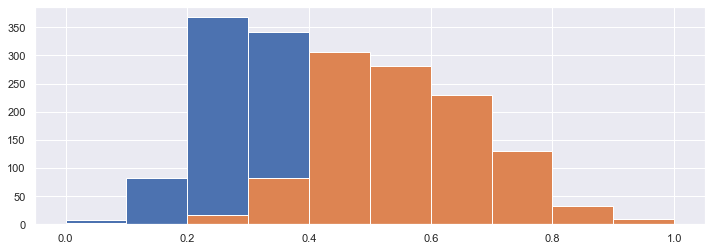

In [23]:
### MinMaxScaler
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax_train = scaler.fit_transform(x_train)

ax.hist(x_minmax_train [:,0]);
ax.hist(x_minmax_train [:,1]);

In [24]:
### Scale test set
scaler = MinMaxScaler()
x_minmax_test = scaler.fit_transform(x_test)

In [25]:
reg = LinearRegression()
reg.fit(x_minmax_train, y_train)
reg.score(x_minmax_train, y_train)

0.7982123377798463

In [22]:
scores = cross_val_score(reg, x_minmax, y_train, cv=5)
scores

array([0.77365021, 0.80969918, 0.79233391, 0.7993649 , 0.79634617])